In [1]:
import pandas as pd
import numpy as np
import gseapy as gp
from gseapy.plot import barplot, dotplot
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def check(list_to_check):
    new = []
    for s in list_to_check:
        if "_" in s:
            new.append(s)
    if len(new) == 0:
        print('No duplicates')
    else:
        print('duplicates present')
    return new

In [5]:
def venn_diagram_comparison(flagship_df, pancan_df, cancer):
    # flagship
    trans_fg = flagship_df.loc[(flagship_df[cancer+"_P_Value"] <= 0.05)]
    #duplicates due to different database id were labeled with and _#. 
    #Remove so it won't be counted as a different gene in VennDiagram 
    trans_fg["Proteomics"] = trans_fg['Proteomics'].str.replace(r"_[0-9]$","", regex=True)
    genes_fg = trans_fg.Proteomics.to_list()
    
    # pancan
    trans_pc = pancan_df.loc[(pancan_df[cancer+"_P_Value"] <= 0.05)]
    #duplicates due to different database id were labeled with and _#. 
    #Remove so it won't be counted as a different gene in VennDiagram 
    trans_pc["Umich_Proteomics"] = trans_pc['Umich_Proteomics'].str.replace(r"_[0-9]$","", regex=True)
    genes_pc = trans_pc.Umich_Proteomics.to_list()
    
    flagship_genes = set(genes_fg)
    pancan_genes = set(genes_pc)
    venn2([flagship_genes, pancan_genes],("Flagship_genes", "Pancan_genes"))
    plt.title(cancer)
    plt.show()
    plt.close()

In [11]:
# Get all vals for all cancers for flagship and pancan 
all_trans_fg = pd.read_csv("../../PTEN/Make_Tables/csv/all_proteins.csv", sep = ',')
all_trans_pc = pd.read_csv("csv/all_proteins_pancan.csv")

In [12]:
cancer_list = ['GBM', 'HNSCC', 'LSCC', 'LUAD', 'EC', 'OV', 'CO'] # no sig in BR in both

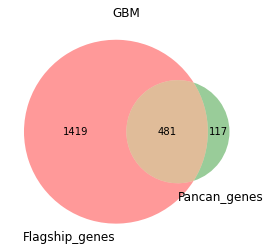

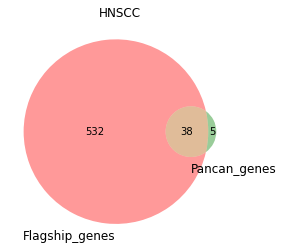

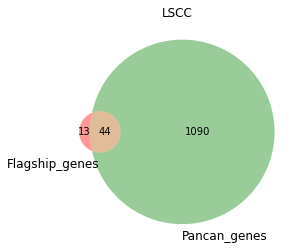

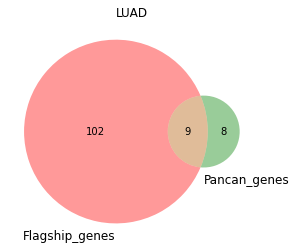

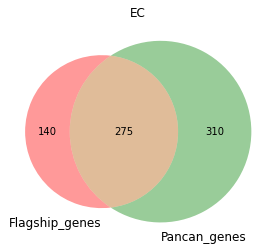

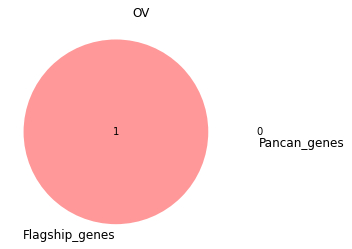

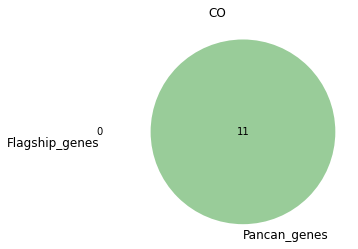

In [13]:
for ca in cancer_list:
    venn_diagram_comparison(all_trans_fg, all_trans_pc, ca)

In [14]:
cancer = 'HNSCC'

In [15]:
# flagship
trans_fg = all_trans_fg.loc[(all_trans_fg[cancer+"_P_Value"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
trans_fg["Proteomics"] = trans_fg['Proteomics'].str.replace(r"_[0-9]$","", regex=True)
genes_fg = trans_fg.Proteomics.to_list()
len(genes_fg)

570

In [16]:
# pancan
trans_pc = all_trans_pc.loc[(all_trans_pc[cancer+"_P_Value"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
trans_pc["Umich_Proteomics"] = trans_pc['Umich_Proteomics'].str.replace(r"_\d$","", regex=True)
genes_pc = trans_pc.Umich_Proteomics.to_list()
len(set(genes_pc))

43

In [17]:
print('flagship:')
print(check(genes_fg))
print('\npancan:')
check(genes_pc)

flagship:
duplicates present
['APOBEC3A_B']

pancan:
No duplicates


[]

Text(0.5, 1.0, 'HNSCC')

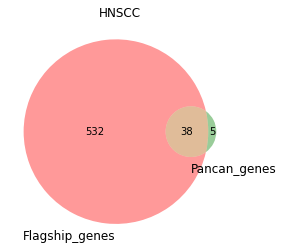

In [18]:
flagship_genes = set(genes_fg)
pancan_genes = set(genes_pc)
venn2([flagship_genes, pancan_genes],("Flagship_genes", "Pancan_genes"))
plt.title(cancer)

# GBM

In [19]:
# Get flagship 
all_trans_fg = pd.read_csv("../../PTEN/Make_Tables/csv/all_proteins.csv", sep = ',')
gbm_trans_fg = all_trans_fg.loc[(all_trans_fg["GBM_P_Value"] <= 0.05)]
gbm_genes_fg = gbm_trans_fg.Proteomics.to_list()
len(gbm_genes_fg)

1900

In [20]:
matching = [s for s in gbm_genes_fg if "_" in s]
len(matching)

0

In [21]:
gbm_trans_pc = all_trans_pc.loc[(all_trans_pc["GBM_P_Value"] <= 0.05)]
#duplicates due to different database id were labeled with an _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
gbm_trans_pc["Umich_Proteomics"] = gbm_trans_pc['Umich_Proteomics'].str.replace(r"_\d","")
gbm_genes_pc = gbm_trans_pc.Umich_Proteomics.to_list()
len(set(gbm_trans_pc))

17

In [22]:
matching = [s for s in gbm_genes_pc if "_" in s]
len(matching)

0

Text(0.5, 1.0, 'GBM')

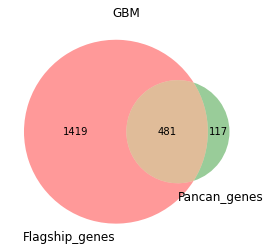

In [23]:
og_genes = set(gbm_genes_fg)
pancan_genes = set(gbm_genes_pc)
venn2([og_genes,pancan_genes],("Flagship_genes", "Pancan_genes"))
plt.title('GBM')

In [24]:
sig_both_gene = og_genes.intersection(pancan_genes)
print(len(sig_both_gene))
flagship_only = og_genes - sig_both_gene
print(len(flagship_only))
pancan_only = pancan_genes - sig_both_gene
print(len(pancan_only))

481
1419
117


Histogram of pancan p-values for trans genes that are no longer significant

In [27]:
gbm_pancan_no_longer_sig

,Umich_Proteomics,GBM_P_Value,GBM_Median,HNSCC_P_Value,HNSCC_Median,LUAD_P_Value,LUAD_Median,LSCC_P_Value,LSCC_Median,BR_P_Value,BR_Median,EC_P_Value,EC_Median,OV_P_Value,OV_Median,CO_P_Value,CO_Median


In [31]:
#gbm_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_GBM")
gbm_trans_pc["Umich_Proteomics"] = gbm_trans_pc['Umich_Proteomics'].str.replace(r"_\d","")
gbm_pancan_no_longer_sig = gbm_trans_pc.loc[gbm_trans_pc.Umich_Proteomics.isin(flagship_only)]
gbm_trans_pc[gbm_trans_pc['Umich_Proteomics'].isin(flagship_only)]

,Umich_Proteomics,GBM_P_Value,GBM_Median,HNSCC_P_Value,HNSCC_Median,LUAD_P_Value,LUAD_Median,LSCC_P_Value,LSCC_Median,BR_P_Value,BR_Median,EC_P_Value,EC_Median,OV_P_Value,OV_Median,CO_P_Value,CO_Median


ValueError: Could not interpret value `GBM_P_value` for parameter `x`

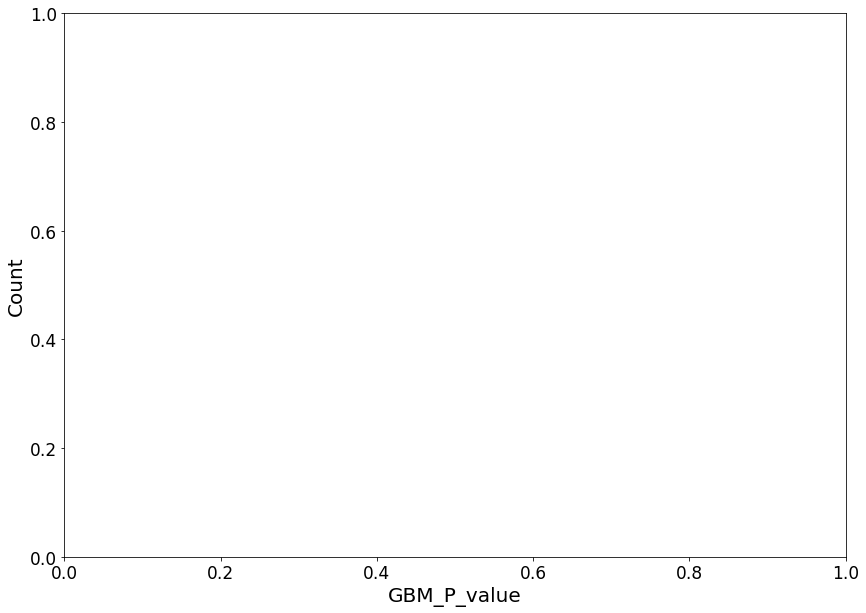

In [28]:
#gbm_pancan_no_longer_sig.P_value_GBM.hist(bins = 30)
plt.figure(figsize=(14, 10))
plt.xlabel("GBM_P_value", fontsize=20)
plt.ylabel( "Count", fontsize=20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
sns.histplot(data=gbm_pancan_no_longer_sig, x="GBM_P_value", bins = 30)

In [30]:
gbm_og_trans = pd.read_csv("../../PTEN/Make_Tables/csv_files/trans_effects_all_prot_fdr_corrected_GBM")
gbm_og_trans =gbm_og_trans.loc[(gbm_og_trans["P_value_GBM"] <= 0.05)]
gbm_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_GBM")

gbm_pancan_trans = gbm_pancan_trans.rename(columns={"Correlation_GBM": "Correlation_GBM_pancan","P_value_GBM":"P_value_GBM_pancan" })
gbm_og_trans = gbm_og_trans.rename(columns={"Correlation_GBM": "Correlation_GBM_og","P_value_GBM":"P_value_GBM_og" })
gbm_pancan_trans = gbm_pancan_trans.set_index("Comparison")
gbm_og_trans = gbm_og_trans.set_index("Comparison")

#significant in flagship and all in pancan
both_gbm = gbm_pancan_trans.join(gbm_og_trans, how = "right")
both_gbm = both_gbm.dropna()
both_gbm


FileNotFoundError: [Errno 2] No such file or directory: '../../PTEN/Make_Tables/csv_files/trans_effects_all_prot_fdr_corrected_GBM'

In [ ]:
both_gbm["Diff_pval"] = both_gbm["P_value_GBM_pancan"] - both_gbm["P_value_GBM_og"]
both_gbm.sort_values(by=['Diff_pval'], inplace=True, ascending=False)

In [ ]:
both_gbm

In [ ]:
sig_both_gene = list(sig_both_gene)

In [ ]:
same_sign_enr = gp.enrichr(gene_list = sig_both_gene, description='Tumor_partition', gene_sets='NCI-Nature_2016', 
                       outdir='test/enrichr_NCI-Nature')
same_sign_enr.res2d.head(10)

# HNSCC 

In [ ]:
# flagship
hnscc_og_trans = all_trans_fg.loc[(all_trans_fg["HNSCC_P_Value"] <= 0.05)]
hnscc_og_trans["Proteomics"] = hnscc_og_trans['Proteomics'].str.replace(r"_\d","")
og_hnscc_genes = hnscc_og_trans.Proteomics.to_list()
len(set(og_hnscc_genes))
hnscc_og_trans

In [ ]:
matching = [s for s in pancan_hnscc_genes if "_" in s]
len(matching)

In [ ]:
hnscc_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_HNSCC")
hnscc_pancan_trans =hnscc_pancan_trans.loc[(hnscc_pancan_trans["P_value_HNSCC"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
hnscc_pancan_trans["Comparison"] = hnscc_pancan_trans['Comparison'].str.replace(r"_\d","")
pancan_hnscc_genes = hnscc_pancan_trans.Comparison.to_list()
len(set(pancan_hnscc_genes))

In [ ]:
og_genes = set(og_hnscc_genes)
pancan_genes = set(pancan_hnscc_genes)
venn2([og_genes,pancan_genes],("Flagship_genes", "Pancan_genes"))
plt.title('HNSCC')

# LUAD

In [ ]:
luad_og_trans = pd.read_csv("../../EGFR/Make_Tables/csv_files/trans_effects_all_prot_fdr_corrected_LUAD")
luad_og_trans = luad_og_trans.loc[(luad_og_trans["P_value_LUAD"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
luad_og_trans["Comparison"] = luad_og_trans['Comparison'].str.replace(r"_\d","")
og_luad_genes = luad_og_trans.Comparison.to_list()
len(set(og_luad_genes))

In [ ]:
luad_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_LUAD")
luad_pancan_trans = luad_pancan_trans.loc[(luad_pancan_trans["P_value_LUAD"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
luad_pancan_trans["Comparison"] = luad_pancan_trans['Comparison'].str.replace(r"_\d","")
pancan_luad_genes = luad_pancan_trans.Comparison.to_list()
len(set(pancan_luad_genes))

In [ ]:
matching = [s for s in og_luad_genes if "_" in s]
len(matching)

In [ ]:
og_genes = set(og_luad_genes)
pancan_genes = set(pancan_luad_genes)
venn2([og_genes,pancan_genes],("Flagship_genes", "Pancan_genes"))
plt.title('LUAD')

# ccRCC

In [ ]:
ccrcc_og_trans = pd.read_csv("../../EGFR/Make_Tables/csv_files/trans_effects_all_prot_fdr_corrected_ccRCC")
ccrcc_og_trans = ccrcc_og_trans.loc[(ccrcc_og_trans["P_value_ccRCC"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
ccrcc_og_trans["Comparison"] = ccrcc_og_trans['Comparison'].str.replace(r"_\d","")
og_ccrcc_genes = ccrcc_og_trans.Comparison.to_list()
len(set(og_ccrcc_genes))

In [ ]:
ccrcc_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_ccRCC")
ccrcc_pancan_trans = ccrcc_pancan_trans.loc[(ccrcc_pancan_trans["P_value_ccRCC"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
ccrcc_pancan_trans["Comparison"] = ccrcc_pancan_trans['Comparison'].str.replace(r"_\d","")
pancan_ccrcc_genes = ccrcc_pancan_trans.Comparison.to_list()
len(set(pancan_ccrcc_genes))


In [ ]:
matching = [s for s in og_ccrcc_genes if "_" in s]
len(matching)

In [ ]:
og_genes = set(og_ccrcc_genes)
pancan_genes = set(pancan_ccrcc_genes)
venn2([og_genes,pancan_genes],("Flagship_genes", "Pancan_genes"))
plt.title('ccRCC')

# LSCC

In [ ]:
lscc_og_trans = pd.read_csv("../../EGFR/Make_Tables/csv_files/trans_effects_all_prot_fdr_corrected_LSCC")
lscc_og_trans = lscc_og_trans.loc[(lscc_og_trans["P_value_LSCC"] <= 0.05)]
#duplicates due to different database id were labeled with and _#. 
#Remove so it won't be counted as a different gene in VennDiagram 
lscc_og_trans["Comparison"] = lscc_og_trans['Comparison'].str.replace(r"_\d","")
og_lscc_genes = lscc_og_trans.Comparison.to_list()
len(set(og_lscc_genes))

In [ ]:
matching = [s for s in og_lscc_genes if "_" in s]
matching

In [ ]:
lscc_pancan_trans = pd.read_csv("csv_files/trans_effects_all_prot_fdr_corrected_LSCC")
lscc_pancan_trans = lscc_pancan_trans.loc[(lscc_pancan_trans["P_value_LSCC"] <= 0.05)]
pancan_lscc_genes = lscc_pancan_trans.Comparison.to_list()
len(set(pancan_luad_genes))


In [ ]:
og_genes = set(og_lscc_genes)
pancan_genes = set(pancan_lscc_genes)
venn2([og_genes,pancan_genes],("Flagship_genes", "Pancan_genes"))
plt.title('LSCC')